# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [67]:
# Checking the number of mice.
Total_mice = combined_data["Mouse ID"].nunique()
print (f'Numbers of Mice are: {Total_mice}')

Numbers of Mice are: 249


In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateMice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
print(duplicateMice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandata_df=combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleandata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = cleandata_df["Mouse ID"].unique()
number_of_mice = len(clean_mice_data)
number_of_mice

249

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drugregimen_data = cleandata_df.set_index(["Drug Regimen"])
groupregimen_data = drugregimen_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drugreg_mean = groupregimen_data["Tumor Volume (mm3)"].mean()
drugreg_median = groupregimen_data["Tumor Volume (mm3)"].median()
drugreg_var = groupregimen_data["Tumor Volume (mm3)"].var()
drugreg_std =groupregimen_data["Tumor Volume (mm3)"].std()
drugreg_sem = groupregimen_data["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

drugreg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drugreg_mean,
                                 "Median Tumor Volume":  drugreg_median,
                                 "Tumor Volume Variance":  drugreg_var,
                                 "Tumor Volume Std. Dev.":  drugreg_std,
                                 "Tumor Volume Std. Err.":  drugreg_sem})
drugreg_sum_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = drugregimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

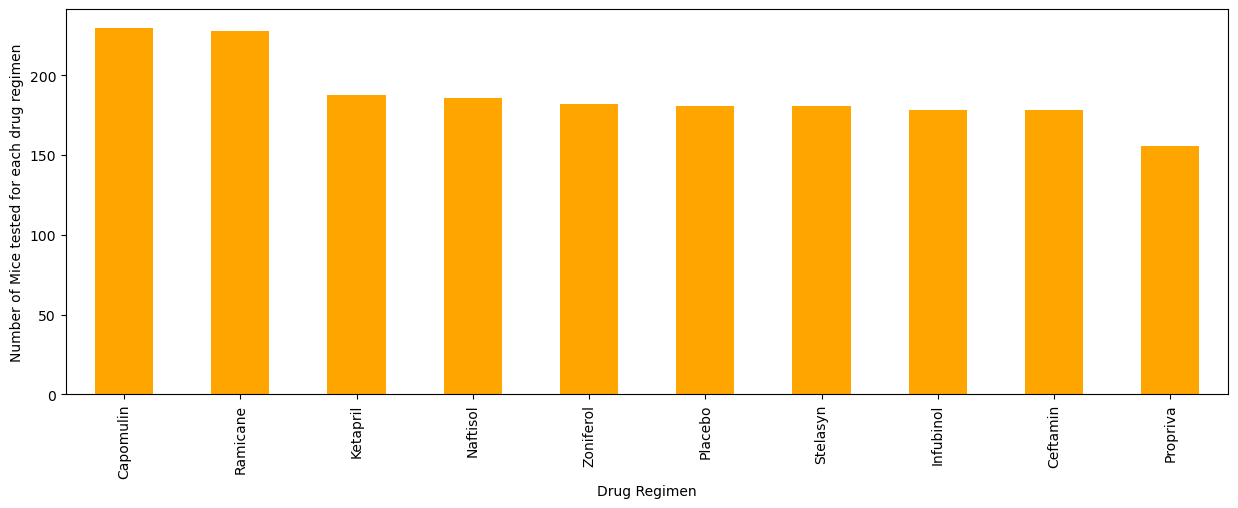

In [75]:
# # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# # Filter the DataFrame down only to those columns to chart
regimen_data = cleandata_df[["Drug Regimen","Timepoint"]]

#find count per drug
mice_per_regimen= regimen_data ["Drug Regimen"].value_counts()
mice_per_regimen

#Use DataFrame.plot() in order to create a bar chart of the data


mice_per_regimen.plot(kind="bar",color = "orange",
                      figsize=(15,5), xlabel="Drug Regimen", 
                      ylabel="Number of Mice tested for each drug regimen")

plt.show()

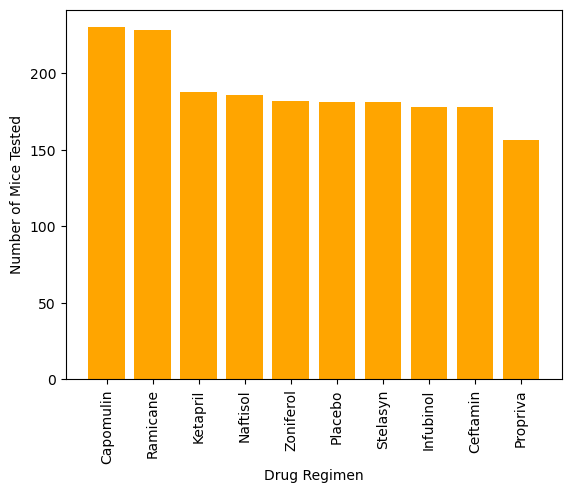

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = mice_per_regimen.index.values
count = mice_per_regimen.values

#graph build and display
plt.bar(drugs, count, color="orange", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

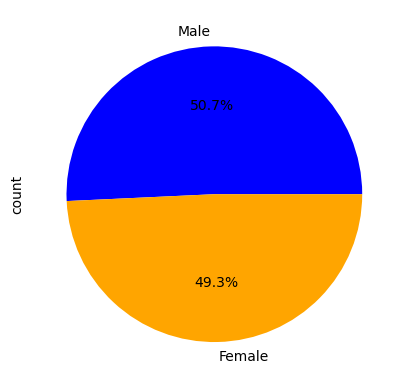

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = cleandata_df["Sex"].value_counts()
Sex = ["Male", "Female"]
male_v_female.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.show()



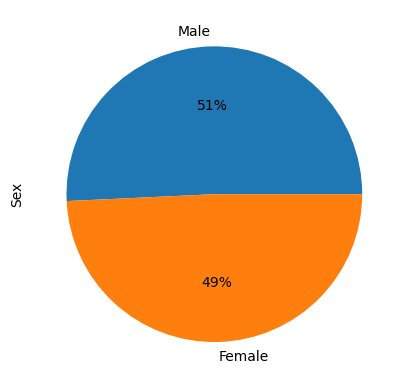

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_v_female.index.values
count_value = male_v_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:


# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a list of the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# the last (greatest) timepoint for each mouse
max_timepoints = cleandata_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = max_timepoints.merge(cleandata_df, on=['Mouse ID', "Timepoint"], how = "left")

final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

# Calculate the quartiles (Q1 and Q3) and IQR for each treatment regimen

# Group the data by treatment regimen and mouse ID to get the final tumor volume for each mouse

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    final_vol_df = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, "Tumor Volume (mm3)"]

    
    # Create a series that consists of all final volume values for each regimen

    tumor_values.append(final_vol_df)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = final_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (final_vol_df.loc[(final_vol_df > upper_bound) | 
                                        (final_vol_df < lower_bound)])
    print(f'Number of {drug} outliers: {outliers_count}')
	


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


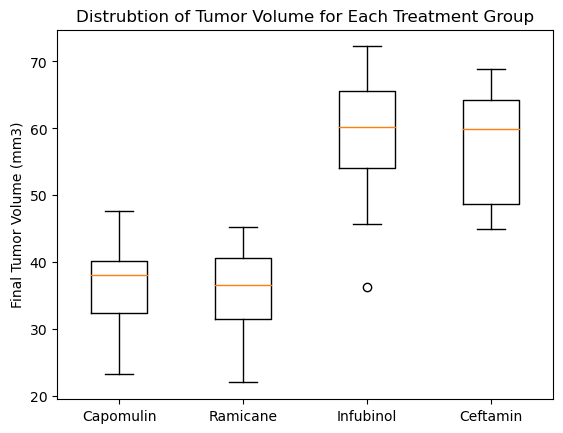

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Distrubtion of Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_values, labels = drugs)
plt.show()

## Line and Scatter Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


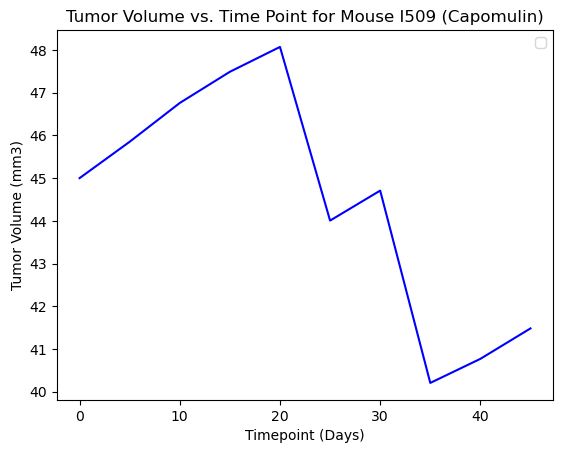

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create dataframe with just Capolumin data

# Filter the final_tumor_volume DataFrame for the specific mouse treated with Capomulin
mouse_data = cleandata_df.loc[cleandata_df['Mouse ID'] == "l509"]

# Extract the time point and tumor volume data for the mouse
time_points = mouse_data['Timepoint']
tumor_volume = mouse_data['Tumor Volume (mm3)']

# Generate the line plot
plt.plot(time_points, tumor_volume, color='blue')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse I509 (Capomulin)')
plt.legend()

# Show the plot
plt.show()

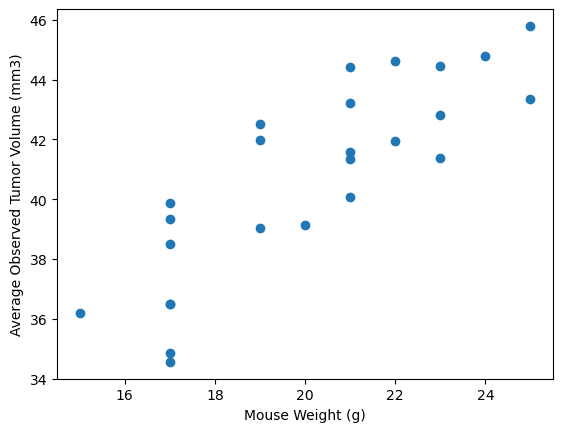

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter Dataframe of Capomulin regimen only
capomulin_df= cleandata_df.loc[(cleandata_df['Drug Regimen'] == 'Capomulin'),['Mouse ID','Tumor Volume (mm3)','Weight (g)']]

# Average tumor volume for each mouse
avg_obs_tumor_vol = list(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

# Find the average mouse weight 
mouse_weight = list(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean())


# plot those list as a scatter plot. 
plt.scatter(mouse_weight,avg_obs_tumor_vol )
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
The linear regression model is y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


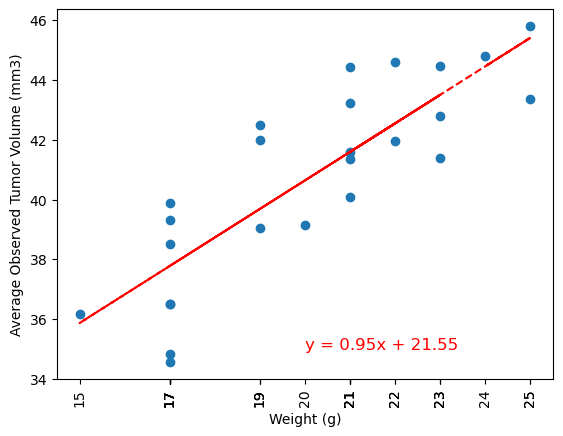

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the Pearson correlation coefficient 
correlation = st.pearsonr(mouse_weight,avg_obs_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

#Calculate the liner regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_obs_tumor_vol)
print(f"The linear regression model is y = {round(slope,2)}x + {round(intercept,2)}")


t_fit = slope * x_values + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,t_fit,"--", color='r')
plt.xticks(x_values, rotation=90)
plt.annotate(line_eq,(20,35),fontsize=12,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue**2}")

plt.show()